In [1]:
# 导入清洗数据所需的包
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # 高清作图

# 绘图风格
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

# 自定义配色
nature_colors = {
    'NS': "#c83c1c",
    'Nature': "#29303c",
    'NCC': "#0889a6",
    'NC': "#f1801f",
    'NG': "#006c43",
    'NHB': "#1951A0",
    'NEE': "#C7D530"
}

# 根据自定义配色生成调色板
nature_palette = sns.color_palette(nature_colors.values())
sns.set_palette(nature_palette)

In [2]:
past = pd.read_csv("daylio_export_2020_11_19.csv", )
now = pd.read_csv("daylio_export_2020_12_30.csv")

In [3]:
df = pd.concat([past, now])
df['full_date'] = pd.to_datetime(df['full_date'])
df['mood'].unique()

array(['焦虑', '不爽', '充实', '开心', '狂喜', '兴奋', '平淡', '超烂', '麻木', '还行'],
      dtype=object)

In [4]:
df.head()

,full_date,date,weekday,time,mood,activities,note,note_title
0,2020-11-18,11月18日,星期三,下午8:53,焦虑,转移,NaN,NaN
1,2020-11-18,11月18日,星期三,下午2:06,不爽,升华,NaN,NaN
2,2020-11-18,11月18日,星期三,下午2:06,焦虑,常规工作,NaN,NaN
3,2020-11-17,11月17日,星期二,下午2:06,充实,科研,NaN,NaN
4,2020-11-16,11月16日,星期一,上午12:37,充实,科研,NaN,NaN


In [5]:
mood_map = {
    "超烂": -2,
    "麻木": -2,
    "焦虑": -1,
    "不爽": -1,
    "充实": 1,
    "开心": 1,
    "平淡": 0,
    "还行": 0,
    "狂喜": 2,
    "兴奋": 2
}

moods = ['Awful', 'Anxious', 'Bland', 'Delighted', 'Excited']
df['mood_level'] = df['mood'].map(mood_map)

结论1: 今年正面的情绪大于负面的

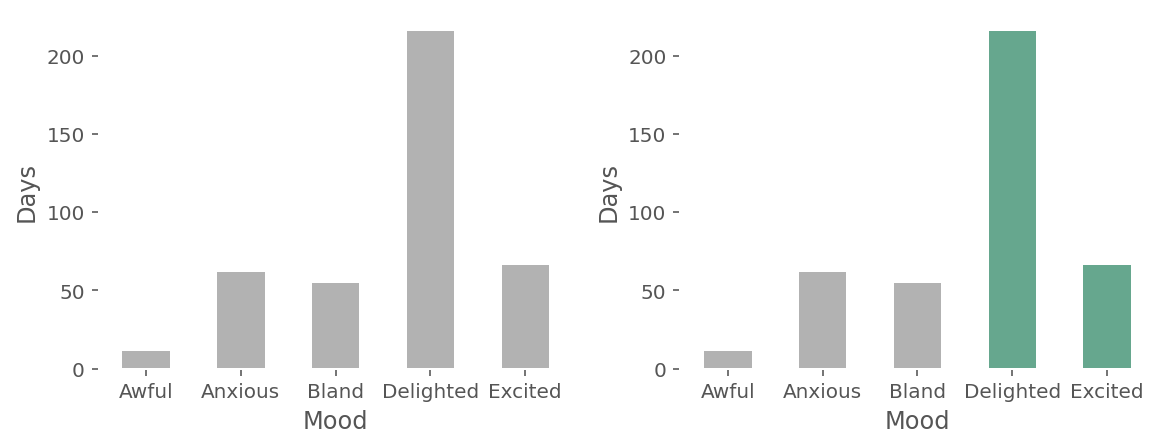

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)

# 统计每个心情出现的天数
df.pivot_table(index=['mood_level'], aggfunc='count')['date'].plot.bar(ax=ax1, rot=0, color='gray', alpha=0.6)

# 利用颜色进行区分，能够让你的观点更明确
color_list = ['gray', 'gray', 'gray', nature_colors['NG'], nature_colors['NG']]
df.pivot_table(index=['mood_level'], aggfunc='count')['date'].plot.bar(ax=ax2, rot=0, color=color_list, alpha=0.6)

# 添加必要的注释
for ax in [ax1, ax2]:
    ax.set_xticklabels(moods)
    ax.set_xlabel("Mood")
    ax.set_ylabel("Days")
    
plt.savefig("figs/fig1.jpg", dpi=300)
plt.show();

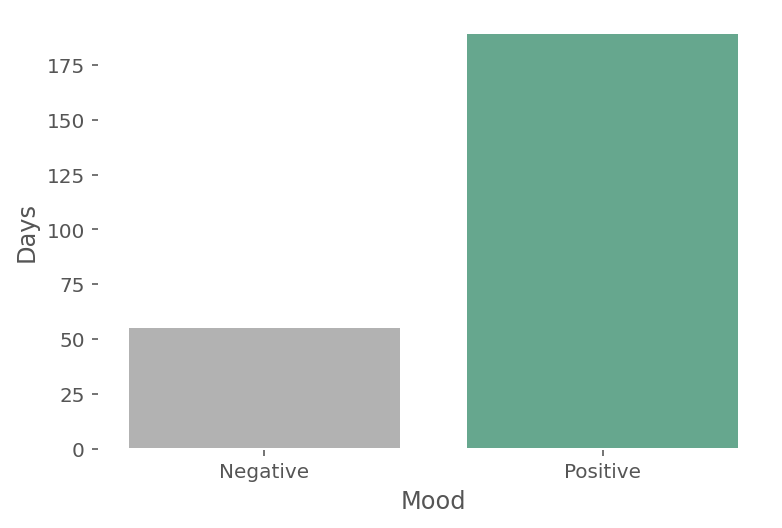

In [37]:
# 只对比积极情绪和消极情绪，会更加强调积极

happy_mask = df['mood_level'] > 0
sad_mask = df['mood_level'] < 0

happy = len(df[happy_mask].groupby('date').sum())
sad = len(df[sad_mask].groupby('date').sum())
bland = len(df[df['mood_level'] == 0].groupby('date').sum())

fig, ax = plt.subplots()

# 图1
ax.bar(x=1, height=happy, bottom=0, color=nature_colors['NG'], label='Positive mood', alpha=0.6)
# ax.bar(x=1, height=bland, bottom=0, color='lightgray', label='Bland', alpha=0.6)
ax.bar(x=0, height=sad, bottom=0, color='gray', label='Negative mood', alpha=0.6)

# 修饰
ax.set_xlabel("Mood")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Negative", "Positive"])
ax.set_ylabel("Days")

plt.savefig("figs/fig2.jpg", dpi=300)
plt.show();

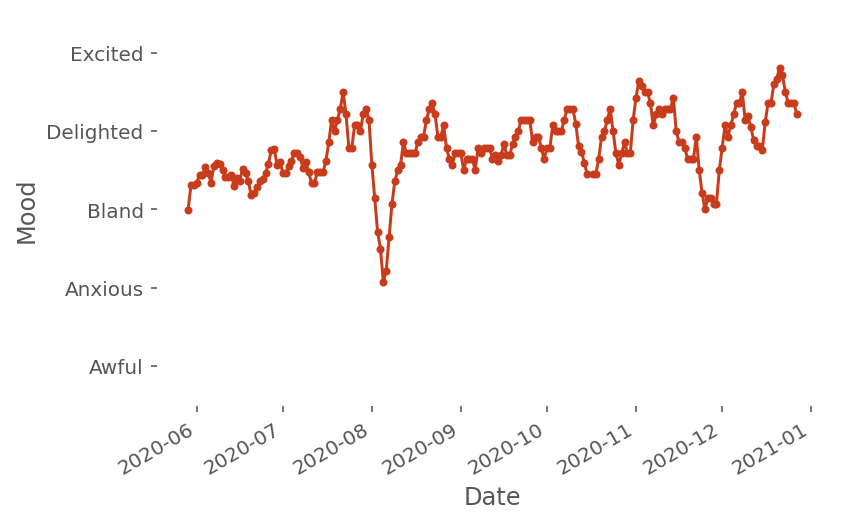

In [45]:
fig, ax1 = plt.subplots(figsize=(6, 4))

mean_30_roll = df.groupby('full_date').mean()['mood_level'].rolling(window=7, center=True).mean().plot(ax=ax1, marker=".")

ax1.set_ylim(-2.5, 2.5)
ax1.set_yticks(np.arange(-2, 3, 1))
ax1.set_yticklabels(moods)
ax1.set_ylabel("Mood")
ax1.set_xlabel("Date")

plt.savefig("figs/change.jpg", dpi=300)
plt.show();

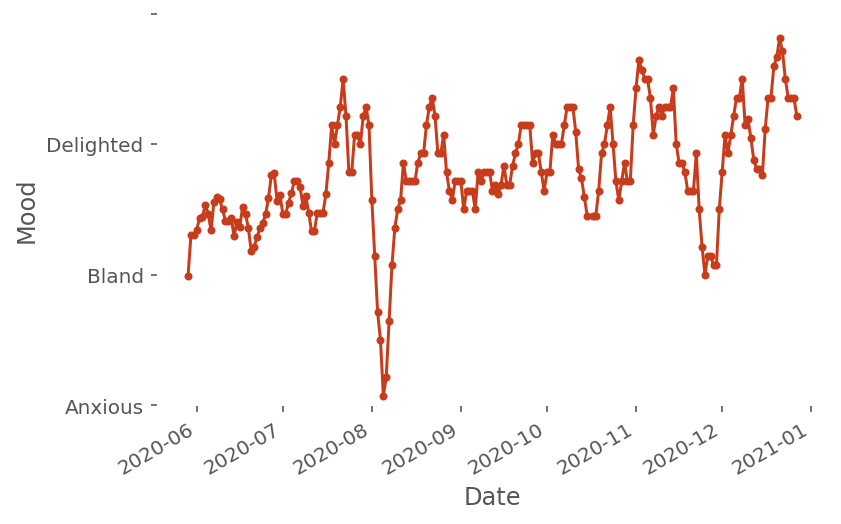

In [43]:
fig, ax2 = plt.subplots(figsize=(6, 4))
mean_30_roll = df.groupby('full_date').mean()['mood_level'].rolling(window=7, center=True).mean().plot(ax=ax2, marker=".")

ax2.set_ylim(0, 1.5)
ax2.set_yticks(np.arange(-1, 3))
ax2.set_yticklabels(['Anxious', 'Bland', 'Delighted'])
ax2.set_ylabel("Mood")
ax2.set_xlabel("Date")

plt.savefig("figs/change2.jpg", dpi=300)
plt.show();

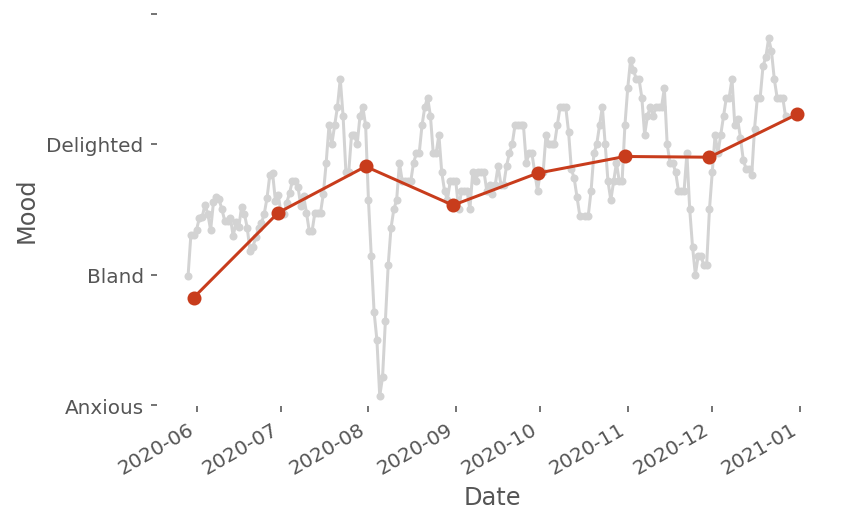

In [44]:
fig, ax = plt.subplots()
mean_30_roll = df.groupby('full_date').mean()['mood_level'].rolling(window=7, center=True).mean()
mean_30_roll.plot(color='lightgray', ax=ax, marker=".")
df.groupby('full_date').mean()['mood_level'].resample("M").mean().plot(ax=ax, marker="o")

ax.set_ylim(0, 1.5)
ax.set_yticks(np.arange(-1, 3))
ax.set_yticklabels(['Anxious', 'Bland', 'Delighted'])
ax.set_xlabel("Date")
ax.set_ylabel("Mood")

plt.savefig("figs/fig4.jpg", dpi=300)
plt.show();